In [1]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans
import numpy as np
import os
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
#get all .edges files
text_files = [file for file in os.listdir("facebook") if file.endswith('.edges')]
for i in range(len(text_files)):
    text_files[i] =  "facebook/" + text_files[i]
# print(text_files)

In [3]:
#Create and Initialize Adjacency matrix
adjacency_matrix = np.zeros((4039,4039))
for file_names in text_files:
    with open(file_names) as file:
        for line in file:
            line = line.split()
            adjacency_matrix[int(line[0])][int(line[1])] = 1
            adjacency_matrix[int(line[1])][int(line[0])] = 1

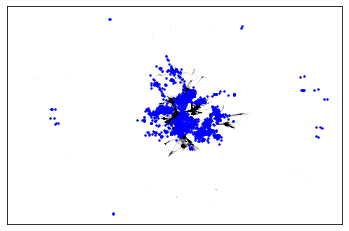

In [10]:
def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw_networkx_nodes(gr, pos=nx.spring_layout(gr),node_size=2, node_color=['blue'])
    nx.draw_networkx_edges(gr, pos=nx.spring_layout(gr),width=0.1, alpha=0.5)
    plt.show()
show_graph_with_labels(adjacency_matrix)

In [20]:
# ON POSTER
# DEGREE MATRIX IS THE AMOUNT OF FRIENDS
degree_matrix = np.diag(adjacency_matrix.sum(axis=1))
print(degree_matrix)
with open('outfile.txt','wb') as f:
    for i in range(len(degree_matrix)):
        np.savetxt(f, degree_matrix[i][i])

    

# for i in range(len(degree_matrix)):
#     print(degree_matrix[i][i])

[[ 2.  0.  0. ...  0.  0.  0.]
 [ 0. 16.  0. ...  0.  0.  0.]
 [ 0.  0.  9. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  3.  0.]
 [ 0.  0.  0. ...  0.  0.  8.]]


ValueError: Expected 1D or 2D array, got 0D array instead

In [ ]:
laplacian = degree_matrix - adjacency_matrix

In [ ]:
# eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(laplacian)
# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

In [ ]:
# kmeans on first three vectors with nonzero eigenvalues
kmeans = KMeans(n_clusters=10)
kmeans.fit(vecs[:,1:4])
colors = kmeans.labels_

In [ ]:
print("Clusters:", colors)

Clusters: [0 0 0 ... 0 0 0]


In [ ]:
# debug_output = open("debug_output.txt", "w")
# for i in range(len(adjacency_matrix)):
#     for j in range(len(adjacency_matrix)):
#         debug_output.write(np.array2string(adjacency_matrix[i][j]) + " ")
#     debug_output.write("\n")

# for i in range(len(adjacency_matrix)):
#     for j in range(len(adjacency_matrix)):
#         if (adjacency_matrix[i][j] == 1):
#             print(i,j)

# debug_output = open("debug_output.txt", "w")
# for i in range(len(laplacian)):
#     for j in range(len(laplacian)):
#         debug_output.write(np.array2string(laplacian[i][j]) + " ")
#     debug_output.write("\n")

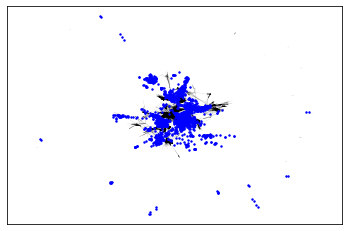

In [ ]:
def show_graph(adjacency_matrix):
    for i in adjacency_matrix:
        print(i)
show_graph_with_labels(adjacency_matrix)